<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/ps5_by_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import seaborn as sns
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

#1st Project:

Research question: how does socioeconomic disadvantage affect voterturn out in General election 2022?

##Selected datasets:

##Independent variables: Poverty rates, Food insecurity rates, and Unemployment rates by state

In [2]:
poverty=pd.read_excel("https://github.com/shimjide123/datman/raw/main/us-poverty-rate-2022-by-state.xlsx")

In [3]:
poverty.head()

,State,Poverty rate
0,United States,11.5
1,New Mexico,18.2
2,Mississippi,17.8
3,Louisiana,16.9
4,Arkansas,15.9


In [4]:
food=pd.read_excel("https://github.com/shimjide123/datman/raw/main/mapdata2022.xlsx")

In [5]:
food.head()

,State,Food insecurity rate,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [6]:
unemployment=pd.read_excel("https://github.com/shimjide123/datman/raw/main/statistic_id223675_us-annual-unemployment-rate-2022-by-state.xlsx")

In [7]:
unemployment.head()

,State,Unemployment rate
0,Nevada,5.4
1,District of Columbia,4.7
2,Illinois,4.6
3,Delaware,4.5
4,Pennsylvania,4.4


In [8]:
Turnout=pd.read_excel("https://github.com/shimjide123/datman/raw/main/2022%20November%20General%20Election(1).xlsx")

In [9]:
Turnout.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.
1,Alabama*,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR


##merge

In [10]:
Turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [11]:
Turnout_unemployment['_merge'].value_counts()

both          39
left_only     13
right_only    12
Name: _merge, dtype: int64

In [12]:
Turnout_unemployment.query("_merge=='left_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874.0,0.461620,242690810.0,261673203.0,1157707.0,1145315.13,340972.0,2643994.13,U.S.,NaN,left_only
1,Alabama*,1424087.0,0.372797,3820009.0,3977770.0,25328.0,32710.83,8245.0,66283.83,AL,NaN,left_only
13,Idaho*,595350.0,0.425940,1397732.0,1490206.0,7996.0,18918.42,5967.0,32881.42,ID,NaN,left_only
17,Kansas*,1008998.0,0.475663,2121246.0,2251251.0,8477.0,10953.06,5428.0,24858.06,KS,NaN,left_only
25,Mississippi*,709100.0,0.324705,2183828.0,2263618.0,17569.0,20026.56,10510.0,48105.56,MS,NaN,left_only
26,Missouri*,2304250.0,0.496337,4642509.0,4822855.0,22890.0,26736.81,20729.0,70355.81,MO,NaN,left_only
37,Oklahoma*,1153284.0,0.395864,2913333.0,3080502.0,22071.0,15888.63,2237.0,40196.63,OK,NaN,left_only
39,Pennsylvania*,5410022.0,0.543539,9953327.0,10366708.0,38938.0,0.00,0.0,38938.00,PA,NaN,left_only
40,Rhode Island*,361449.0,0.436272,828495.0,890835.0,2227.0,0.00,0.0,2227.00,RI,NaN,left_only
42,South Dakota*,354670.0,0.530641,668380.0,695896.0,3176.0,5209.50,3673.0,12058.50,SD,NaN,left_only


In [13]:
Turnout_unemployment.query("_merge=='right_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
52,Pennsylvania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,right_only
53,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
54,Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
55,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,right_only
56,Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,right_only
57,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,right_only
58,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,right_only
59,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
60,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
61,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,right_only


In [14]:
Turnout.loc[Turnout['State']=='Alabama*','State']='Alabama'
Turnout.loc[Turnout['State']=='Missouri*','State']='Missouri'
Turnout.loc[Turnout['State']=='Idaho*','State']='Idaho'
Turnout.loc[Turnout['State']=='Kansas*','State']='Kansas'
Turnout.loc[Turnout['State']=='Mississippi*','State']='Mississippi'
Turnout.loc[Turnout['State']=='Oklahoma*','State']='Oklahoma'
Turnout.loc[Turnout['State']=='Pennsylvania*','State']='Pennsylvania'
Turnout.loc[Turnout['State']=='Rhode Island*','State']='Rhode Island'
Turnout.loc[Turnout['State']=='South Dakota*','State']='South Dakota'
Turnout.loc[Turnout['State']=='Tennessee*','State']='Tennessee'
Turnout.loc[Turnout['State']=='Texas*','State']='Texas'
Turnout.loc[Turnout['State']=='Wisconsin*','State']='Wisconsin'

 #at the later stage I will do all of the replace on condition

In [15]:
turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [16]:
turnout_unemployment['_merge'].value_counts()

both          51
left_only      1
right_only     0
Name: _merge, dtype: int64

In [17]:
turnout_unemployment.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,both


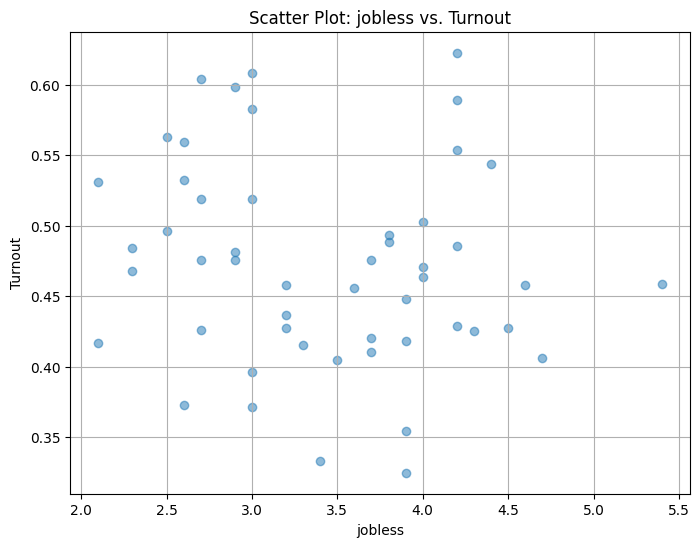

In [18]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()

In [19]:
import seaborn as sns